# Lab 5: Image Classification

| ![MNIST data](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/220px-MnistExamples.png) |
|:--:|
| <b>[MNIST Dataset: Handwritten Digits](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)</b>|

## Applying Machine Learning to Images using scikit-learn

This lab session focuses on the application of supervised learning to images using [scikit-learn](https://scikit-learn.org/stable/auto_examples/index.html) (also called sklearn). More specifically, you are going to design an optical recognition system that recognizes hand written digits trained on the popular [MNIST dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) and puts out a numeric value based on the image it is fed.

Performing preprocessing, splitting the data into a train-, and test-set, training a model, making predictions on the test-set and finally evaluating the model's performance are the steps you are going to perform during our session.

In [1]:
%pip install sklearn matplotlib seaborn

  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 

## TASK 1: Making Yourself Familiar with the Data (15%)

The MNIST handwritten digits dataset can be loaded directly from scikit-learn.
The code below loads the digits dataset for you and prints its description

### 1. Loading the dataset

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### 2. Inspect the data (5%)
- What object type is `digits`? Store its `type` into variable `mnist_type`.
- You will find out that `digits` is container-like (more specifically dict-like). Find out how to access its keys that are used to store data within the container and store this list of keys in variable `mnist_keys`.

In [4]:
# YOUR CODE HERE
mnist_type = type(digits)
print(mnist_type)
mnist_keys = list(digits.keys())
print(mnist_keys)

<class 'sklearn.utils.Bunch'>
['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']


In [ ]:
# Ignore this cell - it is needed for automated grading.

### 3. Plot an image and its label from the dataset (10%)

Now that you know how to access `images` and `target` in `digits`, access a single image and then plot this image using matplotlib's [`imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
Then, set the image `target` (may also be called label in related literature, denotes the true numeric value of handwritten digit in image in this case) as the plot title by accessing the `target` corresponding to the image you chose.

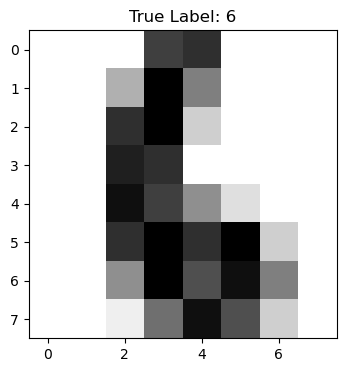

In [8]:
import matplotlib.pyplot as plt
img_nr = 6

image = digits.images[img_nr]
target = digits.target[img_nr]

plt.figure(figsize=(4, 4))
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"True Label: {target}")
plt.show()

## TASK 2: Preprocessing (5%)

As this dataset is wildly popular in the optical recognition domain and highly preprocessed already, preprocessing can be kept simple.

The only thing you need to know is, that the simple classifier you are about to apply to the image data is not able to process two-dimensional data. This is why you need to [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) the images contained in `digits.images` to be one-dimensional.

Store this 1D representation of `digits.images` in the variable `data`.

In [11]:
# YOUR CODE HERE
data = digits.images.reshape(len(digits.images), -1)

In [ ]:
# Ignore this cell - it is needed for automated grading.

## TASK 3: Splitting the Data into a Train-, and Test-Set (10%)

To correctly apply supervised learning, you need to make sure that the `data` and labels your model is trained on is strictly kept separate from the data your model's performance is tested on.

Conveniently, sklearn provides the handy function [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to do this for you.

Apply the split while making sure that the data and corresponding targets are correctly matched (hint: this can be done by passing `data` and `digits.target` to `train_test_split()`). Store the train-, and test-set containing 1D-representation of the images to `X_train` and `X_test`, store the corresponding labels to `y_train` and `y_test`.

In [14]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=12345)

In [ ]:
# Ignore this cell - it is needed for automated grading.

## TASK 4: Training a Support Vector Machine (20%)

Next, you are going to set up the machine learning model that is used in your optical recognition system. More specifically, focus on the [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) classifier provided by sklearn.

If you want to learn more about SVMs and their functionality, you may start with this article on [towardsdatascience.com](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#).

In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

### 1. Instantiate the LinearSVC (10%)

Store an instance of `LinearSVC` in variable `svm`.
You do not need to set specific parameters to certain values, keeping all settings default is fine.

In [16]:
# YOUR CODE HERE
svm = LinearSVC()

In [ ]:
# Ignore this cell - it is needed for automated grading.

### 2. Start the training using the train-set (10%)

This process is typically called _fitting_ and is therefore usually started by calling the `fit()` method of a classifier.
Consult the docs of `LinearSVC` to learn how to do this correctly.

You may get some warnings here because we did not concern ourselves with tuning the `LinearSVC`'s parameters. Ignore these warnings for now.

In [17]:
# YOUR CODE HERE
svm.fit(X_train, y_train)

C:\Users\quint\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
# Ignore this cell - it is needed for automated grading.

## TASK 5: Evaluating the `LinearSVC`'s Performance (30%)

After training, we want to see how well our model is able to perform its task (in our case: recognizing handwritten digits from image data) on new data. This is where the test dataset comes into play!

### 1. Perform prediction on the test-set (10%)

We ask our model to predict a label for each image in the test dataset `X_test`.
This can be done by passing `X_test` to the `svm`'s `predict()` method.
Store the return value of `predict()` in the variable `y_pred`.

In [18]:
# YOUR CODE HERE
y_pred = svm.predict(X_test)

In [ ]:
# Ignore this cell - it is needed for automated grading.

### 2. Evaluate the Performance using Typical Performance Measures (10%)

Want to know how many of the handwritten digits were identified correctly?
To get the answer, calculate and print out the accuracy of our result using the function `accuracy_score()`. Store the result in `svc_accuracy`.

Hint: `accuracy_score` is already imported for you from sklearn at the start of TASK 4.


In [21]:
from sklearn.metrics import accuracy_score

svc_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svc_accuracy)

Accuracy: 0.9444444444444444


In [22]:
assert svc_accuracy > 0.9

### 3. Plot the confusion matrix (10%)

Another way to evaluate your classifier's performance is the plotting of a confusion matrix.
Sklearn provides the method [`ConfusionMatrixDisplay.from_predictions()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) to perform this task.

Make sure to pass the labels for the test set as well as the corresponding predictions to the method `ConfusionMatrixDisplay.from_predictions()`.
Don't forget to set a title for your plot!

Text(0.5, 0.98, 'Confusion Matrix')

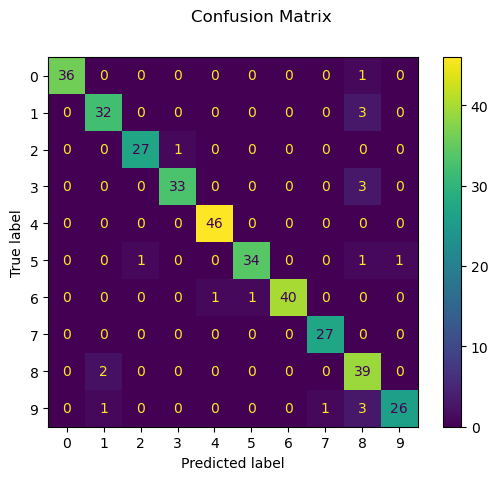

In [26]:
# YOUR CODE HERE
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)

cm_display.figure_.suptitle("Confusion Matrix")

## TASK 6: Recall and Summarize (20%)

You reached the end of our short guided tutorial into the world of supervised learning.
In your own words, give an overview of the tasks you completed up to now in the cell below and include:

- a description of the task you were asked to perform
- the idea behind the classifier (`LinearSVC`) you used (no details about the functionality are needed)
- an interpretation of the results of your evaluation

Description:
We loaded in small images with hand written numbers. We then did the usual ML pipeline on it like train test split, fit and predict. We used LinearSVC for this.

LinearSVC:
LinearSVC stands for Linear Support Vector Classifier. It is a ML algorithm that helps classify data into different categories by finding the best straight line (or hyperplane) that separates the data points into those categories.

Results are really good. 94% accuracy (if it were a more complex model I'd almost say its overfitting :P). Even on the confusion matrix we can see that theres almost a diagonal line. This is what we want. The predictions almost didnt make any mistakes.